In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:

# UCI dataset URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

# Define column names (from UCI description)
columns = ["Class",
           "Alcohol",
           "Malic acid",
           "Ash",
           "Alcalinity of ash",
           "Magnesium",
           "Total phenols",
           "Flavanoids",
           "Nonflavanoid phenols",
           "Proanthocyanins",
           "Color intensity",
           "Hue",
           "OD280/OD315 of diluted wines",
           "Proline"]

# Load dataset
wine_df = pd.read_csv(url, header=None, names=columns)

# Features and labels
X = wine_df.drop("Class", axis=1).values
y = wine_df["Class"].values

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
wine_df.head()

Shape of X: (178, 13)
Shape of y: (178,)


,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:

from sklearn.ensemble import RandomForestClassifier

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Classification
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)

# Prediction
y_pred = classifier.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("----------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))
print("----------------")

print("Accuracy:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[14  0  0]
 [ 2 13  1]
 [ 0  0  6]]
----------------
Performance Evaluation:
              precision    recall  f1-score   support

           1       0.88      1.00      0.93        14
           2       1.00      0.81      0.90        16
           3       0.86      1.00      0.92         6

    accuracy                           0.92        36
   macro avg       0.91      0.94      0.92        36
weighted avg       0.93      0.92      0.92        36

----------------
Accuracy:
0.9166666666666666



SVM (Linear) — With tuning
Best Params: {'C': 0.1}
Confusion Matrix:
 [[13  1  0]
 [ 0 15  1]
 [ 0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.94      0.94      0.94        16
           2       0.86      1.00      0.92         6

    accuracy                           0.94        36
   macro avg       0.93      0.96      0.94        36
weighted avg       0.95      0.94      0.94        36

Accuracy: 0.9444444444444444


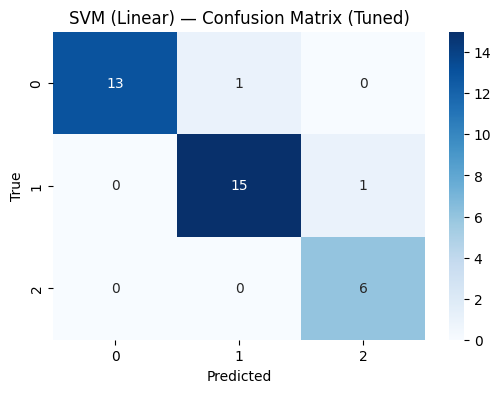

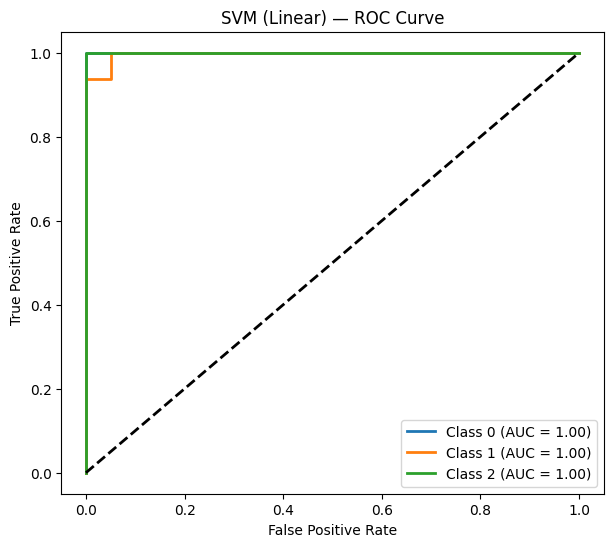

In [ ]:
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, roc_curve, auc
)
from sklearn.preprocessing import label_binarize

# Example dataset (replace with your dataset X, y)
from sklearn.datasets import load_wine   # change to load_breast_cancer for binary case
data = load_wine()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# --------------------------
# SVM (Linear) - With tuning
# --------------------------
param_grid = {'C': [0.1, 1, 10, 100]}
grid = GridSearchCV(SVC(kernel='linear', probability=True, random_state=0),
                    param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

best_svm = grid.best_estimator_
y_pred = best_svm.predict(X_test)

print("\nSVM (Linear) — With tuning")
print("Best Params:", grid.best_params_)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# --------------------------
# Confusion Matrix Heatmap
# --------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("SVM (Linear) — Confusion Matrix (Tuned)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# --------------------------
# ROC & AUC (Binary / Multiclass)
# --------------------------
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)

# Get scores (probabilities)
if hasattr(best_svm, "decision_function"):
    y_score = best_svm.decision_function(X_test)
else:
    y_score = best_svm.predict_proba(X_test)

plt.figure(figsize=(7,6))

if len(classes) == 2:
    # Binary case
    fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.2f}")
else:
    # Multiclass case
    for i, class_label in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f"Class {class_label} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM (Linear) — ROC Curve")
plt.legend(loc="lower right")
plt.show()


SVM (Polynomial) — No tuning
Confusion Matrix:
 [[13  0  1]
 [ 0 16  0]
 [ 0  4  2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.80      1.00      0.89        16
           2       0.67      0.33      0.44         6

    accuracy                           0.86        36
   macro avg       0.82      0.75      0.77        36
weighted avg       0.86      0.86      0.84        36

Accuracy: 0.8611111111111112

SVM (Polynomial) — With tuning
Best Params: {'C': 0.1, 'degree': 3, 'gamma': 'auto'}
Confusion Matrix:
 [[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.0

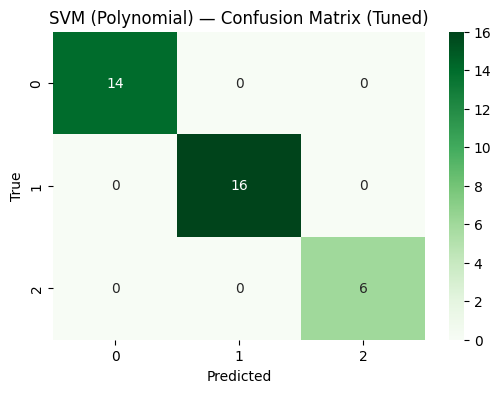

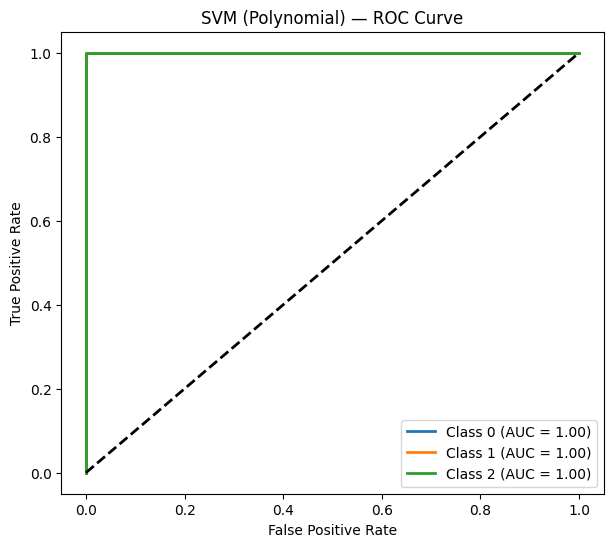

In [ ]:
svm_poly = SVC(kernel='poly', random_state=0, probability=True)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)

print("\nSVM (Polynomial) — No tuning")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_poly))
print("Classification Report:\n", classification_report(y_test, y_pred_poly))
print("Accuracy:", accuracy_score(y_test, y_pred_poly))

# --------------------------
# SVM (Polynomial) - With tuning
# --------------------------
param_grid_poly = {
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4, 5],
    'gamma': ['scale', 'auto']
}

grid_poly = GridSearchCV(
    SVC(kernel='poly', random_state=0, probability=True),
    param_grid_poly,
    cv=5,
    scoring='accuracy'
)

grid_poly.fit(X_train, y_train)

best_svm_poly = grid_poly.best_estimator_
y_pred_poly_tuned = best_svm_poly.predict(X_test)

print("\nSVM (Polynomial) — With tuning")
print("Best Params:", grid_poly.best_params_)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_poly_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_poly_tuned))
print("Accuracy:", accuracy_score(y_test, y_pred_poly_tuned))

# --------------------------
# Heatmap of Confusion Matrix (Tuned Model)
# --------------------------
cm_poly = confusion_matrix(y_test, y_pred_poly_tuned)
plt.figure(figsize=(6,4))
sns.heatmap(cm_poly, annot=True, fmt="d", cmap="Greens",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("SVM (Polynomial) — Confusion Matrix (Tuned)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# --------------------------
# ROC & AUC (Binary / Multiclass)
# --------------------------
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)

# Get decision/probability scores
if hasattr(best_svm_poly, "decision_function"):
    y_score = best_svm_poly.decision_function(X_test)
else:
    y_score = best_svm_poly.predict_proba(X_test)

plt.figure(figsize=(7,6))

if len(classes) == 2:
    # Binary classification
    fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.2f}")
else:
    # Multiclass ROC
    for i, class_label in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f"Class {class_label} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM (Polynomial) — ROC Curve")
plt.legend(loc="lower right")
plt.show()


SVM (Gaussian/RBF) — No tuning
Confusion Matrix:
 [[13  0  1]
 [ 0 12  4]
 [ 0  3  3]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.80      0.75      0.77        16
           2       0.38      0.50      0.43         6

    accuracy                           0.78        36
   macro avg       0.72      0.73      0.72        36
weighted avg       0.81      0.78      0.79        36

Accuracy: 0.7777777777777778

SVM (Gaussian/RBF) — With tuning
Best Params: {'C': 100, 'gamma': 0.001}
Confusion Matrix:
 [[13  1  0]
 [ 1 14  1]
 [ 1  1  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.88      0.88      0.88        16
           2       0.80      0.67      0.73         6

    accuracy                           0.86        36
   macro avg       0.85      0.82      0.83        3

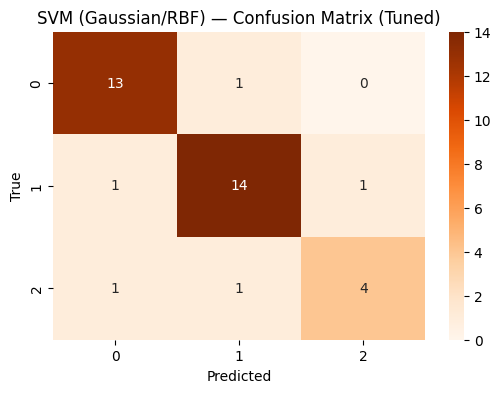

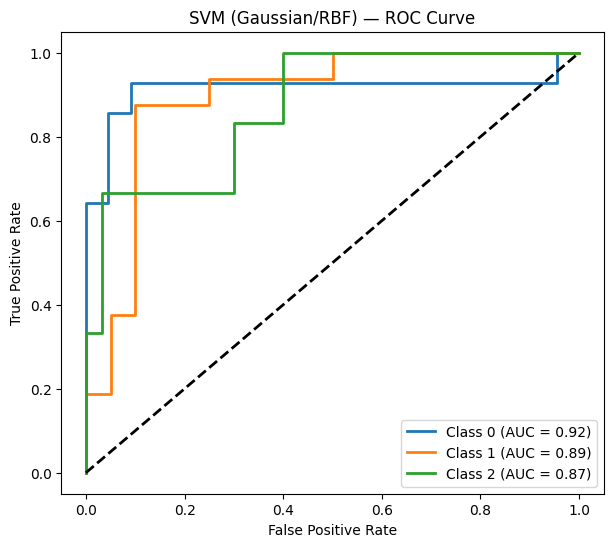

In [ ]:
svm_rbf = SVC(kernel='rbf', random_state=0, probability=True)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print("\nSVM (Gaussian/RBF) — No tuning")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print("Classification Report:\n", classification_report(y_test, y_pred_rbf))
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))

# --------------------------
# SVM (RBF/Gaussian) - With tuning
# --------------------------
param_grid_rbf = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto']
}

grid_rbf = GridSearchCV(
    SVC(kernel='rbf', random_state=0, probability=True),
    param_grid_rbf,
    cv=5,
    scoring='accuracy'
)

grid_rbf.fit(X_train, y_train)

best_svm_rbf = grid_rbf.best_estimator_
y_pred_rbf_tuned = best_svm_rbf.predict(X_test)

print("\nSVM (Gaussian/RBF) — With tuning")
print("Best Params:", grid_rbf.best_params_)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_rbf_tuned))
print("Accuracy:", accuracy_score(y_test, y_pred_rbf_tuned))

# --------------------------
# Heatmap of Confusion Matrix
# --------------------------
cm_rbf = confusion_matrix(y_test, y_pred_rbf_tuned)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rbf, annot=True, fmt="d", cmap="Oranges",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("SVM (Gaussian/RBF) — Confusion Matrix (Tuned)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# --------------------------
# ROC & AUC (Binary / Multiclass)
# --------------------------
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)

# Get decision/probability scores
if hasattr(best_svm_rbf, "decision_function"):
    y_score = best_svm_rbf.decision_function(X_test)
else:
    y_score = best_svm_rbf.predict_proba(X_test)

plt.figure(figsize=(7,6))

if len(classes) == 2:
    # Binary classification
    fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.2f}")
else:
    # Multiclass ROC
    for i, class_label in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f"Class {class_label} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM (Gaussian/RBF) — ROC Curve")
plt.legend(loc="lower right")
plt.show()


SVM (Sigmoid) — No tuning
Confusion Matrix:
 [[ 1 13  0]
 [11  5  0]
 [ 4  2  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.06      0.07      0.07        14
           1       0.25      0.31      0.28        16
           2       0.00      0.00      0.00         6

    accuracy                           0.17        36
   macro avg       0.10      0.13      0.11        36
weighted avg       0.14      0.17      0.15        36

Accuracy: 0.16666666666666666


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



SVM (Sigmoid) — With tuning
Best Params: {'C': 0.1, 'coef0': -1, 'gamma': 'scale'}
Confusion Matrix:
 [[13  1  0]
 [ 4 12  0]
 [ 3  3  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.93      0.76        14
           1       0.75      0.75      0.75        16
           2       0.00      0.00      0.00         6

    accuracy                           0.69        36
   macro avg       0.47      0.56      0.50        36
weighted avg       0.59      0.69      0.63        36

Accuracy: 0.6944444444444444


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


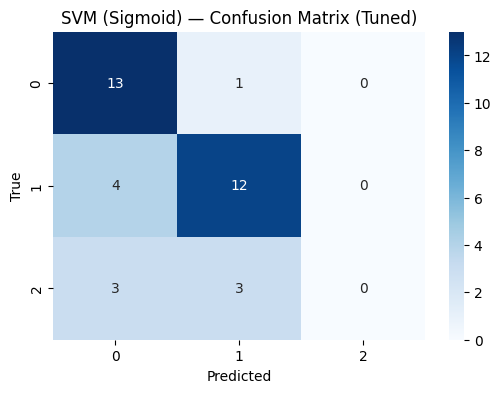

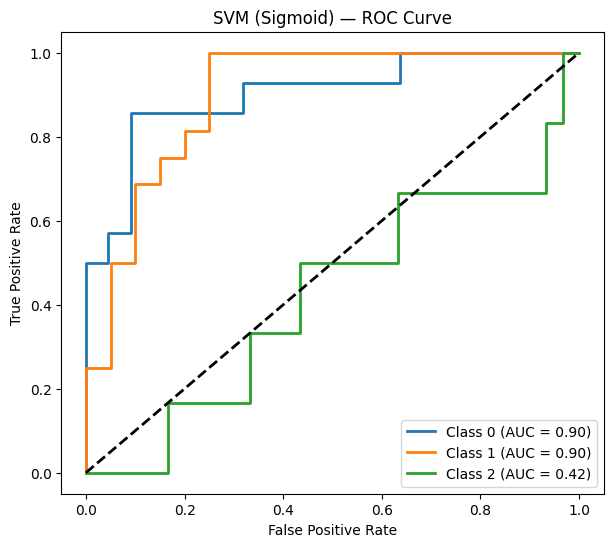

In [ ]:
# --------------------------
# SVM (Sigmoid) — No tuning
# --------------------------
svm_sigmoid = SVC(kernel='sigmoid', random_state=0, probability=True)
svm_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = svm_sigmoid.predict(X_test)

print("\nSVM (Sigmoid) — No tuning")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sigmoid))
print("Classification Report:\n", classification_report(y_test, y_pred_sigmoid))
print("Accuracy:", accuracy_score(y_test, y_pred_sigmoid))

# --------------------------
# SVM (Sigmoid) - With tuning
# --------------------------
param_grid_sigmoid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto'],
    'coef0': [-1, 0, 1, 2]
}

grid_sigmoid = GridSearchCV(
    SVC(kernel='sigmoid', random_state=0, probability=True),
    param_grid_sigmoid,
    cv=5,
    scoring='accuracy'
)

grid_sigmoid.fit(X_train, y_train)

best_svm_sigmoid = grid_sigmoid.best_estimator_
y_pred_sigmoid_tuned = best_svm_sigmoid.predict(X_test)

print("\nSVM (Sigmoid) — With tuning")
print("Best Params:", grid_sigmoid.best_params_)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sigmoid_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_sigmoid_tuned))
print("Accuracy:", accuracy_score(y_test, y_pred_sigmoid_tuned))

# --------------------------
# Heatmap of Confusion Matrix (Tuned Model)
# --------------------------
cm_sigmoid = confusion_matrix(y_test, y_pred_sigmoid_tuned)
plt.figure(figsize=(6,4))
sns.heatmap(cm_sigmoid, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("SVM (Sigmoid) — Confusion Matrix (Tuned)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# --------------------------
# ROC & AUC (Binary / Multiclass)
# --------------------------
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)

# Get decision/probability scores
if hasattr(best_svm_sigmoid, "decision_function"):
    y_score = best_svm_sigmoid.decision_function(X_test)
else:
    y_score = best_svm_sigmoid.predict_proba(X_test)

plt.figure(figsize=(7,6))

if len(classes) == 2:
    # Binary classification
    fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.2f}")
else:
    # Multiclass ROC
    for i, class_label in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f"Class {class_label} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM (Sigmoid) — ROC Curve")
plt.legend(loc="lower right")
plt.show()


MLP Classifier (Momentum=0.9) — No tuning
Confusion Matrix:
 [[14  0  0]
 [16  0  0]
 [ 6  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.39      1.00      0.56        14
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00         6

    accuracy                           0.39        36
   macro avg       0.13      0.33      0.19        36
weighted avg       0.15      0.39      0.22        36

Accuracy: 0.3888888888888889


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


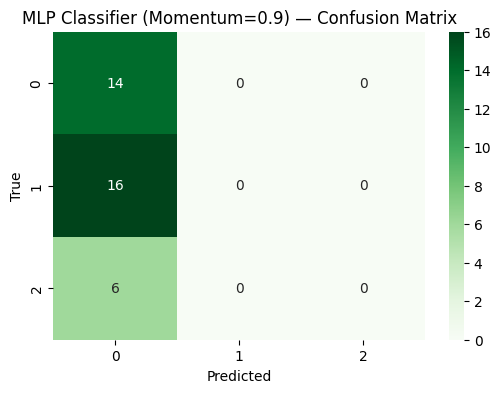


MLP Classifier (Momentum) — With tuning
Best Params: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001, 'momentum': 0.5}
Confusion Matrix:
 [[13  1  0]
 [ 0 16  0]
 [ 1  5  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.73      1.00      0.84        16
           2       0.00      0.00      0.00         6

    accuracy                           0.81        36
   macro avg       0.55      0.64      0.59        36
weighted avg       0.68      0.81      0.74        36

Accuracy: 0.8055555555555556


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


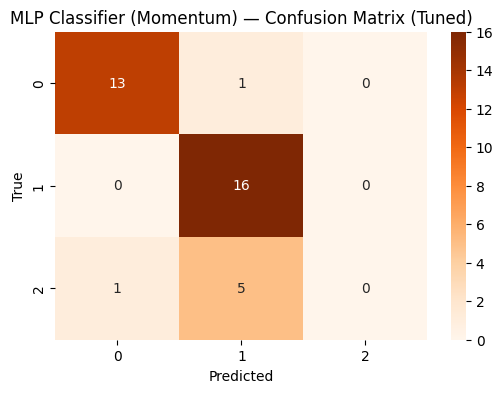

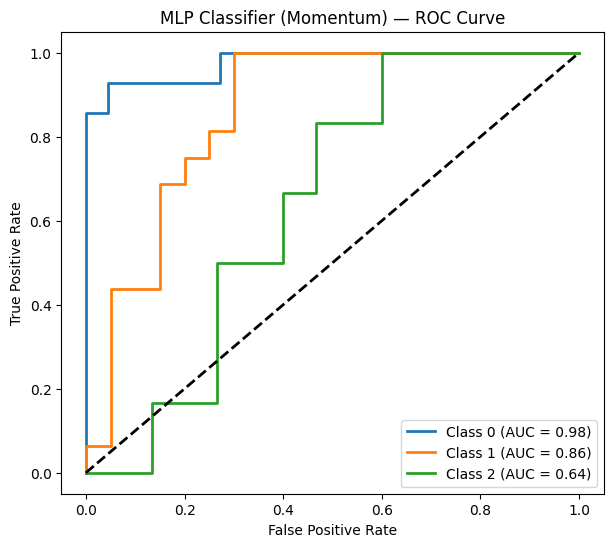

In [ ]:
mlp_momentum = MLPClassifier(
    hidden_layer_sizes=(100,), solver='sgd',
    momentum=0.9, max_iter=500, random_state=0
)

mlp_momentum.fit(X_train, y_train)
y_pred_momentum = mlp_momentum.predict(X_test)

print("\nMLP Classifier (Momentum=0.9) — No tuning")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_momentum))
print("Classification Report:\n", classification_report(y_test, y_pred_momentum))
print("Accuracy:", accuracy_score(y_test, y_pred_momentum))

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred_momentum)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("MLP Classifier (Momentum=0.9) — Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ------------------------------------------------------
# 2. MLP with Momentum — Hyperparameter Tuning
# ------------------------------------------------------
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (128, 64)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01],
    'momentum': [0.5, 0.9]
}

grid_mlp = GridSearchCV(
    MLPClassifier(solver='sgd', max_iter=500, random_state=0),
    param_grid_mlp,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_mlp.fit(X_train, y_train)

best_mlp = grid_mlp.best_estimator_
y_pred_mlp_tuned = best_mlp.predict(X_test)

print("\nMLP Classifier (Momentum) — With tuning")
print("Best Params:", grid_mlp.best_params_)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp_tuned))
print("Accuracy:", accuracy_score(y_test, y_pred_mlp_tuned))

# Heatmap
cm_tuned = confusion_matrix(y_test, y_pred_mlp_tuned)
plt.figure(figsize=(6,4))
sns.heatmap(cm_tuned, annot=True, fmt="d", cmap="Oranges",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("MLP Classifier (Momentum) — Confusion Matrix (Tuned)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ------------------------------------------------------
# 3. ROC & AUC for MLP
# ------------------------------------------------------
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)

# Use predict_proba (MLP supports it)
y_score = best_mlp.predict_proba(X_test)

plt.figure(figsize=(7,6))
if len(classes) == 2:
    fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.2f}")
else:
    for i, class_label in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f"Class {class_label} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("MLP Classifier (Momentum) — ROC Curve")
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



MLP Classifier (Epochs=200) — No tuning
Confusion Matrix:
 [[13  1  0]
 [ 0 15  1]
 [ 0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.94      0.94      0.94        16
           2       0.86      1.00      0.92         6

    accuracy                           0.94        36
   macro avg       0.93      0.96      0.94        36
weighted avg       0.95      0.94      0.94        36

Accuracy: 0.9444444444444444


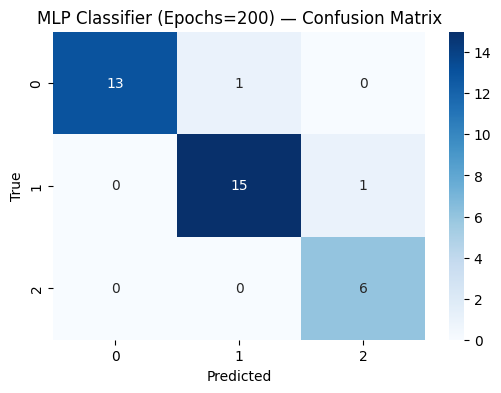

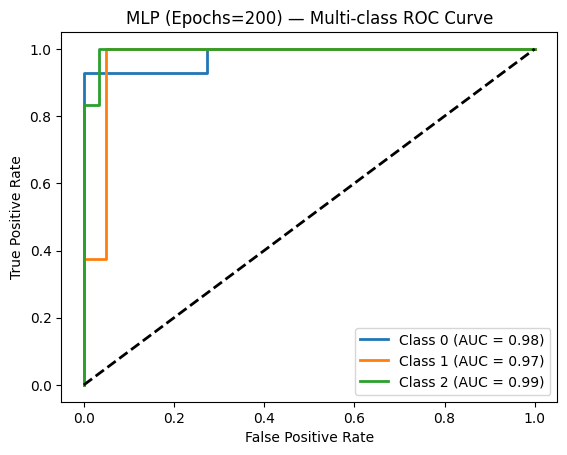

In [ ]:
mlp_epoch = MLPClassifier(
    hidden_layer_sizes=(100,),
    solver='adam',
    max_iter=200,
    random_state=0
)

mlp_epoch.fit(X_train, y_train)
y_pred_epoch = mlp_epoch.predict(X_test)

print("\nMLP Classifier (Epochs=200) — No tuning")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_epoch))
print("Classification Report:\n", classification_report(y_test, y_pred_epoch))
print("Accuracy:", accuracy_score(y_test, y_pred_epoch))

# --------------------------
# Heatmap of Confusion Matrix
# --------------------------
cm = confusion_matrix(y_test, y_pred_epoch)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("MLP Classifier (Epochs=200) — Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# --------------------------
# ROC Curve and AUC
# --------------------------
# Decision function or probability estimates
if hasattr(mlp_epoch, "predict_proba"):
    y_score = mlp_epoch.predict_proba(X_test)
    if y_score.shape[1] == 2:
        # Binary classification
        fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(6,4))
        plt.plot(fpr, tpr, color="darkorange",
                 lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("MLP (Epochs=200) — ROC Curve")
        plt.legend(loc="lower right")
        plt.show()
    else:
        # Multi-class ROC (One-vs-Rest)
        from sklearn.preprocessing import label_binarize
        from sklearn.metrics import roc_auc_score
        y_bin = label_binarize(y_test, classes=np.unique(y))
        fpr, tpr, roc_auc = dict(), dict(), dict()
        for i in range(len(np.unique(y))):
            fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            plt.plot(fpr[i], tpr[i], lw=2,
                     label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

        plt.plot([0, 1], [0, 1], "k--", lw=2)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("MLP (Epochs=200) — Multi-class ROC Curve")
        plt.legend(loc="lower right")
        plt.show()


MLP Classifier (Learning Rate=0.001) — No tuning
Confusion Matrix:
 [[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Accuracy: 1.0


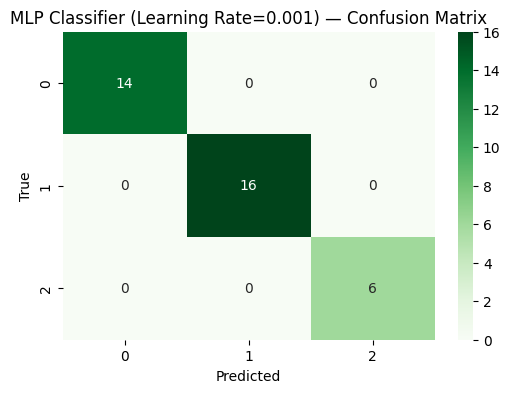

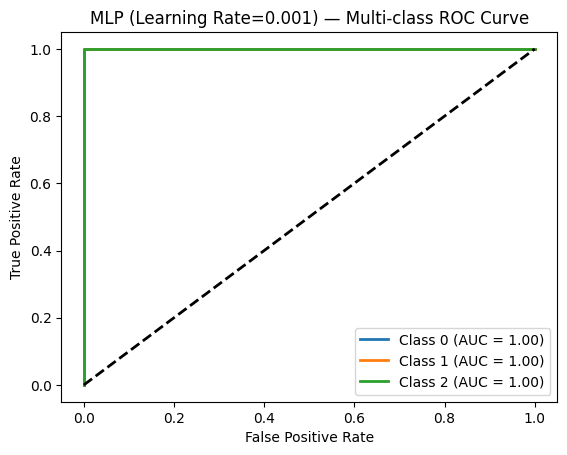

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# ------------------------------------------------------
# 1. MLP with Learning Rate (No tuning) - fixed value
# ------------------------------------------------------
mlp_lr = MLPClassifier(hidden_layer_sizes=(100,), solver='adam',
                       learning_rate_init=0.001, max_iter=500, random_state=0)

mlp_lr.fit(X_train, y_train)
y_pred_lr = mlp_lr.predict(X_test)

print("\nMLP Classifier (Learning Rate=0.001) — No tuning")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

# --------------------------
# Heatmap of Confusion Matrix
# --------------------------
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("MLP Classifier (Learning Rate=0.001) — Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# --------------------------
# ROC Curve and AUC
# --------------------------
if hasattr(mlp_lr, "predict_proba"):
    y_score = mlp_lr.predict_proba(X_test)
    if y_score.shape[1] == 2:
        # Binary classification ROC
        fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(6,4))
        plt.plot(fpr, tpr, color="darkgreen",
                 lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("MLP (Learning Rate=0.001) — ROC Curve")
        plt.legend(loc="lower right")
        plt.show()
    else:
        # Multi-class ROC (One-vs-Rest)
        y_bin = label_binarize(y_test, classes=np.unique(y))
        fpr, tpr, roc_auc = dict(), dict(), dict()
        for i in range(len(np.unique(y))):
            fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            plt.plot(fpr[i], tpr[i], lw=2,
                     label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

        plt.plot([0, 1], [0, 1], "k--", lw=2)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("MLP (Learning Rate=0.001) — Multi-class ROC Curve")
        plt.legend(loc="lower right")
        plt.show()


Random Forest Classifier — No tuning
Confusion Matrix:
 [[14  0  0]
 [ 0 15  1]
 [ 0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        16
           2       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36

Accuracy: 0.9722222222222222


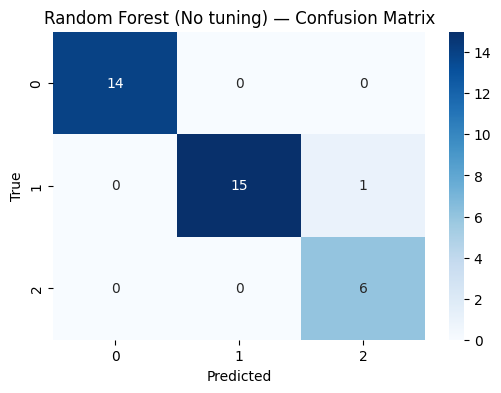

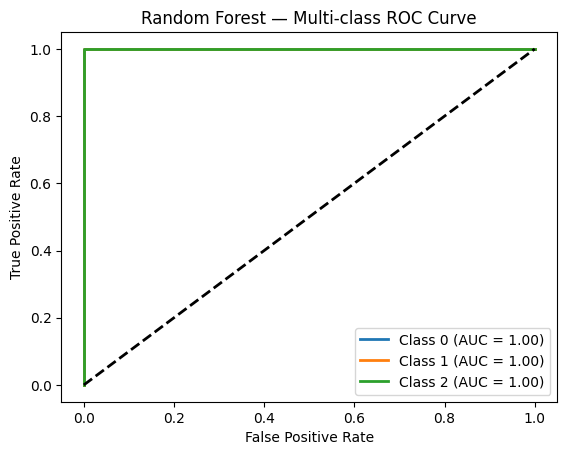

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Classifier — No tuning")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# --------------------------
# Heatmap of Confusion Matrix
# --------------------------
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Random Forest (No tuning) — Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# --------------------------
# ROC Curve and AUC
# --------------------------
if hasattr(rf, "predict_proba"):
    y_score = rf.predict_proba(X_test)

    if y_score.shape[1] == 2:
        # Binary classification ROC
        fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(6,4))
        plt.plot(fpr, tpr, color="darkorange",
                 lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("Random Forest — ROC Curve")
        plt.legend(loc="lower right")
        plt.show()

    else:
        # Multi-class ROC (One-vs-Rest)
        y_bin = label_binarize(y_test, classes=np.unique(y))
        fpr, tpr, roc_auc = dict(), dict(), dict()
        for i in range(len(np.unique(y))):
            fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            plt.plot(fpr[i], tpr[i], lw=2,
                     label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

        plt.plot([0, 1], [0, 1], "k--", lw=2)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("Random Forest — Multi-class ROC Curve")
        plt.legend(loc="lower right")
        plt.show()

In [ ]:
splits = [0.5, 0.4, 0.3, 0.2]   # corresponds to 50:50, 60:40, 70:30, 80:20

results = []

for split in splits:
    print(f"\n================ Train-Test Split {int((1-split)*100)}:{int(split*100)} ================\n")

    # Train-Test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=0, stratify=y)

    # Scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Define classifiers
    classifiers = {
        # --- SVM Variants ---
        "SVM (Linear)": SVC(kernel="linear", random_state=0),
        "SVM (Polynomial)": SVC(kernel="poly", degree=3, random_state=0),
        "SVM (Gaussian/RBF)": SVC(kernel="rbf", random_state=0),
        "SVM (Sigmoid)": SVC(kernel="sigmoid", random_state=0),

        # --- MLP Variants ---
        "MLP (Momentum=0.9)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, momentum=0.9, random_state=0),
        "MLP (Epochs=1000)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=0),
        "MLP (LR=0.01)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, learning_rate_init=0.01, random_state=0),

        # --- Random Forest ---
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=0)
    }

    for clf_name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average="weighted")
        rec = recall_score(y_test, y_pred, average="weighted")
        f1 = f1_score(y_test, y_pred, average="weighted")

        results.append([f"{int((1-split)*100)}:{int(split*100)}", clf_name, acc, prec, rec, f1])

        print(f"\n--- {clf_name} ---")
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print("Accuracy:", acc)
        print("Precision:", prec)
        print("Recall:", rec)
        print("F1 Score:", f1)

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Train-Test Split", "Classifier", "Accuracy", "Precision", "Recall", "F1 Score"])
print("\n================ Summary Table ================\n")
print(results_df)


================ Train-Test Split 50:50 ================


--- SVM (Linear) ---
Confusion Matrix:
 [[30  0  0]
 [ 2 33  0]
 [ 0  1 23]]
Accuracy: 0.9662921348314607
Precision: 0.9673661599471249
Recall: 0.9662921348314607
F1 Score: 0.9662907936652698

--- SVM (Polynomial) ---
Confusion Matrix:
 [[29  1  0]
 [ 1 34  0]
 [ 0  2 22]]
Accuracy: 0.9550561797752809
Precision: 0.9568782265411478
Recall: 0.9550561797752809
F1 Score: 0.955191879715573

--- SVM (Gaussian/RBF) ---
Confusion Matrix:
 [[30  0  0]
 [ 0 35  0]
 [ 0  1 23]]
Accuracy: 0.9887640449438202
Precision: 0.9890761548064918
Recall: 0.9887640449438202
F1 Score: 0.98872363995111

--- SVM (Sigmoid) ---
Confusion Matrix:
 [[30  0  0]
 [ 2 33  0]
 [ 0  0 24]]
Accuracy: 0.9775280898876404
Precision: 0.9789325842696629
Recall: 0.9775280898876404
F1 Score: 0.9775600707843848

--- MLP (Momentum=0.9) ---
Confusion Matrix:
 [[30  0  0]
 [ 1 34  0]
 [ 0  0 24]]
Accuracy: 0.9887640449438202
Precision: 0.9891264951069227
Recall: 0.98876404

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

# Helper function to evaluate classifiers
def evaluate_classifier(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="macro"),
        "Recall": recall_score(y_test, y_pred, average="macro"),
        "F1 Score": f1_score(y_test, y_pred, average="macro"),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# UCI dataset URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

# Define column names (from UCI description)
columns = ["Class",
           "Alcohol",
           "Malic acid",
           "Ash",
           "Alcalinity of ash",
           "Magnesium",
           "Total phenols",
           "Flavanoids",
           "Nonflavanoid phenols",
           "Proanthocyanins",
           "Color intensity",
           "Hue",
           "OD280/OD315 of diluted wines",
           "Proline"]

# Load dataset
wine_df = pd.read_csv(url, header=None, names=columns)

# Features and labels
X = wine_df.drop("Class", axis=1).values
y = wine_df["Class"].values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# PCA Transformation (keep enough components to preserve variance)
pca = PCA(n_components=0.95)  # keep 95% variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define classifiers
classifiers = {
    "SVM (Linear)": SVC(kernel="linear", random_state=0),
    "SVM (Polynomial)": SVC(kernel="poly", degree=3, random_state=0),
    "SVM (Gaussian)": SVC(kernel="rbf", random_state=0),
    "SVM (Sigmoid)": SVC(kernel="sigmoid", random_state=0),
    "MLP (Momentum)": MLPClassifier(solver="sgd", momentum=0.9, max_iter=500, random_state=0),
    "MLP (Epochs=1000)": MLPClassifier(max_iter=1000, random_state=0),
    "MLP (LR=0.001)": MLPClassifier(learning_rate_init=0.001, max_iter=500, random_state=0),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=0)
}

# Store results
results = []

for name, clf in classifiers.items():
    # Before PCA
    res_before = evaluate_classifier(clf, X_train, X_test, y_train, y_test)
    res_before["Classifier"] = name
    res_before["Setting"] = "Before PCA"
    results.append(res_before)

    # After PCA
    res_after = evaluate_classifier(clf, X_train_pca, X_test_pca, y_train, y_test)
    res_after["Classifier"] = name
    res_after["Setting"] = "After PCA"
    results.append(res_after)

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display results (without confusion matrix)
display(results_df.drop(columns=["Confusion Matrix"]))


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,Accuracy,Precision,Recall,F1 Score,Classifier,Setting
0,1.000000,1.000000,1.000000,1.000000,SVM (Linear),Before PCA
1,1.000000,1.000000,1.000000,1.000000,SVM (Linear),After PCA
2,0.944444,0.955357,0.955357,0.955357,SVM (Polynomial),Before PCA
3,0.944444,0.955357,0.955357,0.955357,SVM (Polynomial),After PCA
4,1.000000,1.000000,1.000000,1.000000,SVM (Gaussian),Before PCA
5,1.000000,1.000000,1.000000,1.000000,SVM (Gaussian),After PCA
6,0.972222,0.952381,0.979167,0.963606,SVM (Sigmoid),Before PCA
7,0.972222,0.952381,0.979167,0.963606,SVM (Sigmoid),After PCA
8,1.000000,1.000000,1.000000,1.000000,MLP (Momentum),Before PCA
9,1.000000,1.000000,1.000000,1.000000,MLP (Momentum),After PCA
